In [33]:
import pandas as pd

In [34]:
import numpy as np

In [35]:
import matplotlib.pyplot as plt

In [36]:
from scipy.stats import zscore

In [37]:
import seaborn as sns

In [38]:
data = pd.read_excel("creditdata.xlsx")
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [40]:
dataScaled=data.iloc[:,2:]
dataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [41]:
dataScaled=dataScaled.apply(zscore)
dataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


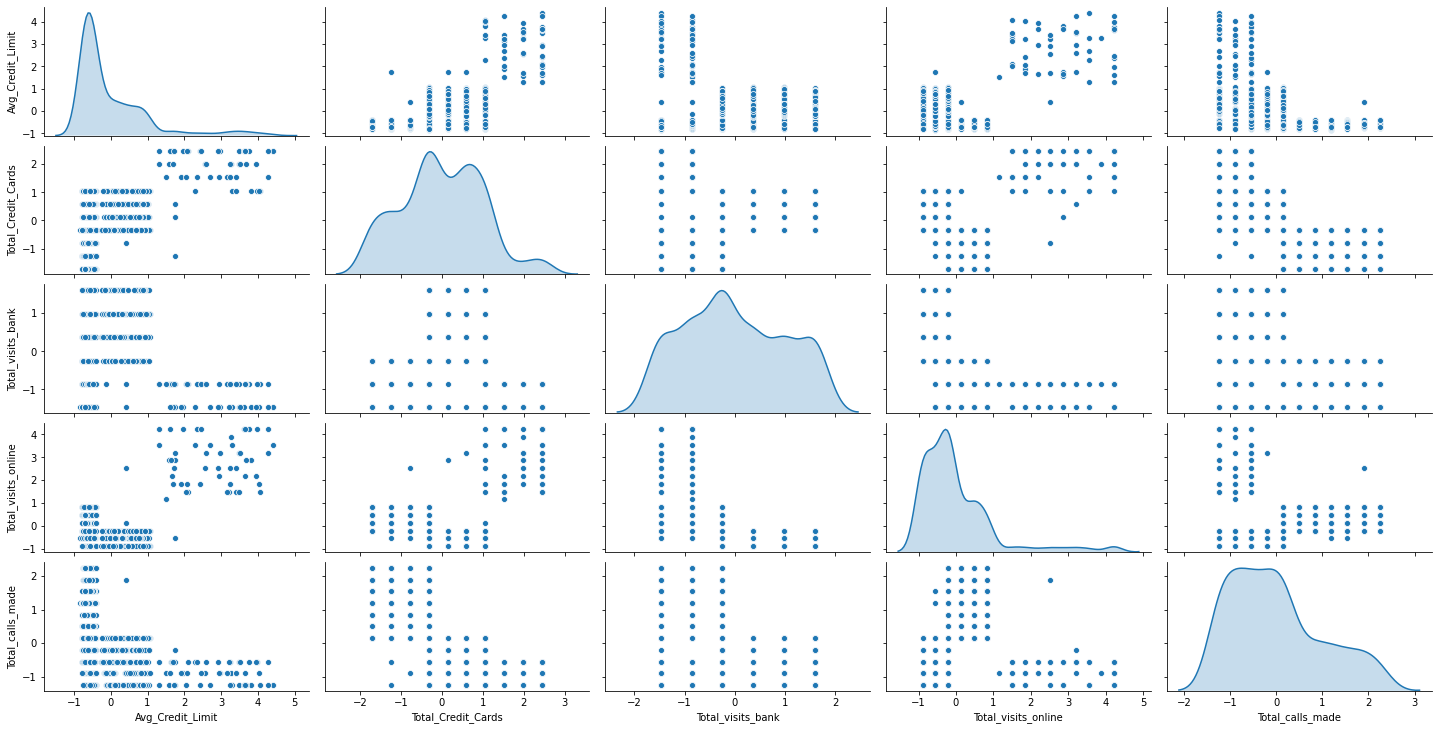

In [42]:
sns.pairplot(dataScaled, height=2, aspect=2, diag_kind='kde')

In [43]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

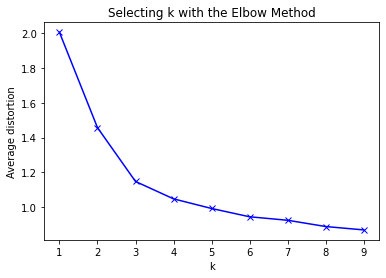

In [44]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataScaled)
    prediction=model.predict(dataScaled)
    meanDistortions.append(sum(np.min(cdist(dataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [46]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(dataScaled)
prediction=final_model.predict(dataScaled)

#Append the prediction 
data["GROUP"] = prediction
dataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


In [47]:
dataCluster = data.groupby(['GROUP'])
dataCluster.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a26e940>,
      dtype=object)

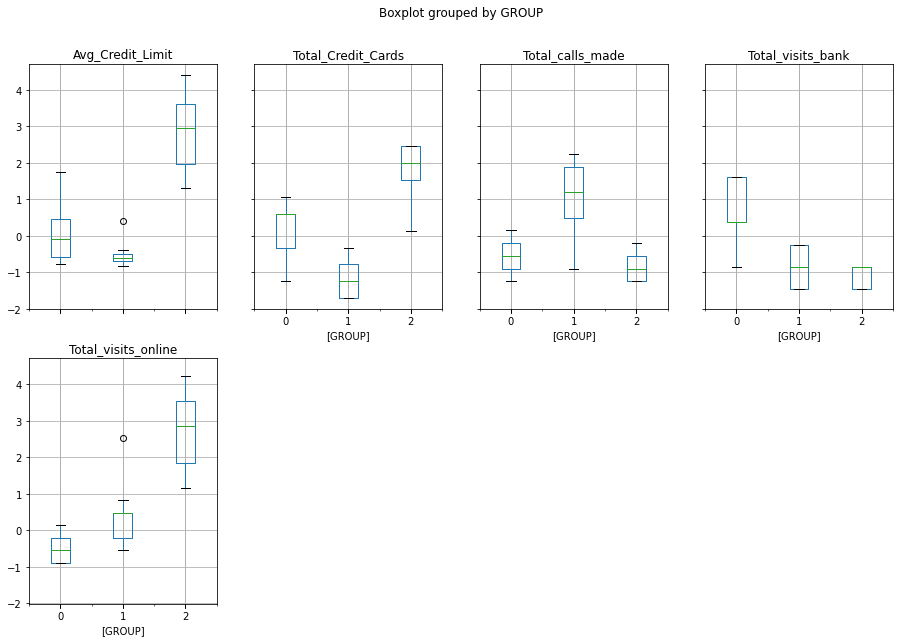

In [48]:
dataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))